# Deep Learning Fundamentals

## What is deep learning?

**Deep learning** is a subset of machine learning, consisting of algorithms inspired by the structure of a human brain. It is particularly useful for working with unstructured data which nevertheless follows some internal rules: images, videos, text, etc.

## Introduction to neural networks


<img src="Perceptron_5_unidades.png" width="400">

For example, this is how the above would look for a simple home price prediction model:

<img src="perceptron.png" width="600">

Here are some examples of neural network architectures:

![](nnexamples.jpg)

Here are some examples of problems which can be tackled with neural networks:

<img src="tblapplications.png" width="400">

### How does it work?

![](example.png)

In [1]:
import numpy as np

# Define input data
input_data = np.array([3,5])

#Define weights
weights = { 'node_0': np.array([2, 4]), 
            'node_1': np.array([ 4, -5]), 
            'output': np.array([2, 7])}

# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()
print(node_0_value)

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()
print(node_1_value)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])
print(hidden_layer_outputs)

# Calculate output: output
output = (hidden_layer_outputs*weights['output']).sum()

# Print output
print(output)

26
-13
[ 26 -13]
-39


## Activation Functions

For neural networks to achieve their maximum predictive power, we must apply something called an **activation function** in the hidden layers. An activation function allows the model to capture non-linearities - without these, our neural network would be no different from a standard linear model! These functions are asssociated to each node, and are applied to node inputs to produce node outputs:

![](activation.png)

The **Rectified Linear Unit (ReLU)** function is the most widely-used activation function in neural networks today. One of the greatest advantages ReLU has over other activation functions is that it does not activate all neurons at the same time. From the image for ReLU function above, we’ll notice that it converts all negative inputs to zero and the neuron does not get activated. This makes it very computationally efficient as few neurons are activated at any given time. In practice, ReLU converges six times faster than other functions like `tanh` and sigmoid.

In [2]:
def relu(input):
    '''relu activation function'''
    output = max(0, input)
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


In [3]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]

# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row,weights))

# Print results
print(results)

[52, 63, 0, 148]


<img src="multiplehiddenlayers1.png" width="500">

In [4]:
def predict_with_network(input_data):
     # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])

    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])
    
    # Calculate output here: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)
weights ={  'node_0_0': np.array([2, 4]),
            'node_0_1': np.array([ 4, -5]),
            'node_1_0': np.array([-1,  2]),
            'node_1_1': np.array([1, 2]),
            'output': np.array([2, 7])}

input_data = np.array([3, 5])
output = predict_with_network(input_data)
print(output)

182


<img src="forward.png" width="400">

### Optimizing weights

However, just because we have a neural network does not mean that we will have a good model. We need to optimize the weights to get this:

<img src="optimization.png" width="400">

The **loss function** gives a single number which summarizes the degree of error in the model's predictions. Similar to the mean-squared error (MSE) of a linear moodel, the loss function gives us a sense of how well the model fits the data. Our goal then is to find the weights for the neural network which minimizes the loss function.

<img src="loss.png" width="400">

There is a method called **gradient descent** which we use in order to find the optimal weights. This method comes from calculus:

<img src="gradient_descent_1d.gif" width="400">

In [5]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)
    
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


In [6]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []
 
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])] 
target_actuals = [1, 3, 5, 7]

weights_0 = {
    'node_0': np.array([2, 1]), 
    'node_1': np.array([1, 2]), 
    'output': np.array([1, 1])}
weights_1 = {
    'node_0': np.array([2, 1]),
    'node_1': np.array([1. , 1.5]),
    'output': np.array([1. , 1.5])}
# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)


Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


<img src="slope.png" width="400">

In [7]:
# Calculate the predictions: preds
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = input_data * error * 2

# Print the slope
print(slope)

[14 28 42]


In [8]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


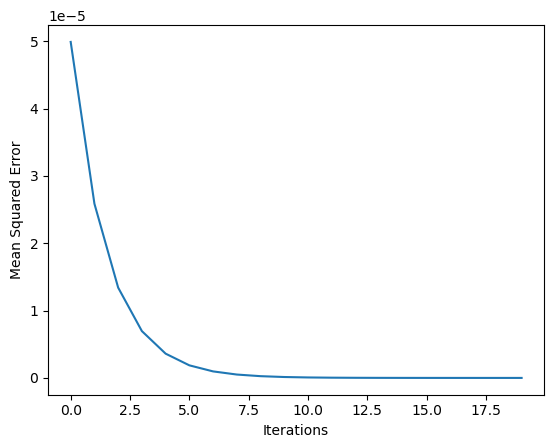

In [9]:
import matplotlib.pyplot as plt

n_updates = 20
mse_hist = []
input_data = np.array([1, 2, 3])
target = 0
weights = np.array([-0.49929916,  1.00140168, -0.49789747])

def get_slope(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target 
    return input_data * error * 2

def get_mse(input_data, target, weights):
    preds = (weights * input_data).sum()
    return mean_squared_error([preds], [target])

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    #print(slope)
    # Update the weights: weights
    weights = weights - 0.01 * slope
    #print(weights)
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    #print(mse)
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

<img src="NN_C8.png" width="400">

<img src="NN_C9.png" width="400">

<img src="newweights.png" width="200">

## Creating a `keras` model 

There are a few different libraries at our disposal for creating a neural network model:

<img src="libraries.png" width="400">

Here, we will go with `keras`.

In [10]:
# Complete tutorial: https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4
import pandas as pd

df = pd.read_csv('housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [11]:
dataset = df.values

In [12]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [13]:
X = dataset[:,0:10]

In [14]:
Y = dataset[:,10]

In [15]:
Y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [16]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [17]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [19]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [20]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


### Setting up the architecture

The architecture that we want to implement is this:

<img src="architecture.png" width="400">

- Hidden layer 1: 32 neurons, ReLU activation
- Hidden layer 2: 32 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [21]:
from keras.models import Sequential
from keras.layers import Dense

In [22]:
#  sequentially (layer by layer)
#  ‘Dense’ refers to a fully-connected layer
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [23]:
# ‘sgd’ refers to stochastic gradient descent
# The loss function for outputs that take the values 1 or 0 is called binary cross entropy.
# we want to track accuracy on top of the loss function
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=120,
          validation_data=(X_val, Y_val))

Epoch 1/120


32/32 [==============================] - 2s 13ms/step - loss: 0.6897 - accuracy: 0.5176 - val_loss: 0.6844 - val_accuracy: 0.5982
Epoch 2/120
32/32 [==============================] - 0s 4ms/step - loss: 0.6829 - accuracy: 0.6243 - val_loss: 0.6773 - val_accuracy: 0.7260
Epoch 3/120
32/32 [==============================] - 0s 6ms/step - loss: 0.6768 - accuracy: 0.7299 - val_loss: 0.6715 - val_accuracy: 0.7763
Epoch 4/120
32/32 [==============================] - 0s 9ms/step - loss: 0.6714 - accuracy: 0.7583 - val_loss: 0.6655 - val_accuracy: 0.7945
Epoch 5/120
32/32 [==============================] - 0s 5ms/step - loss: 0.6657 - accuracy: 0.7818 - val_loss: 0.6589 - val_accuracy: 0.8082
Epoch 6/120
32/32 [==============================] - 0s 5ms/step - loss: 0.6599 - accuracy: 0.7975 - val_loss: 0.6533 - val_accuracy: 0.8082
Epoch 7/120
32/32 [==============================] - 0s 4ms/step - loss: 0.6549 - accuracy: 0.7984 - val_loss: 0.6480 - val_accuracy: 0.8265
Epoch 8/12

In [25]:
# The reason why we have the index 1 after the model.evaluate function is because the function returns the loss as the first element and the accuracy as the second element.
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.2335 - accuracy: 0.8995


0.8995434045791626

### Visualizing loss and accuracy

<img src="graphics.png" width="400">

A good model is one where the testing and training set errors are very similar, and at their lowest point.

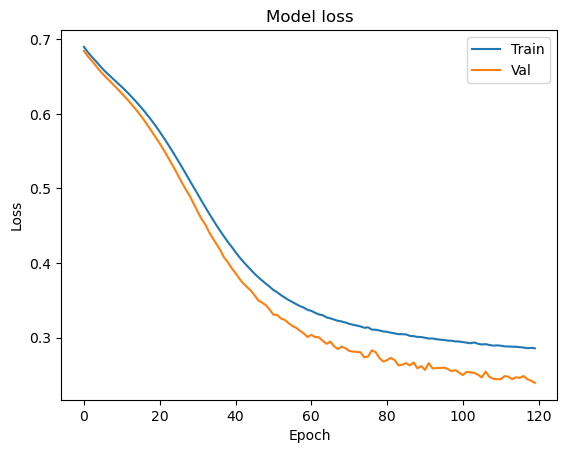

In [26]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

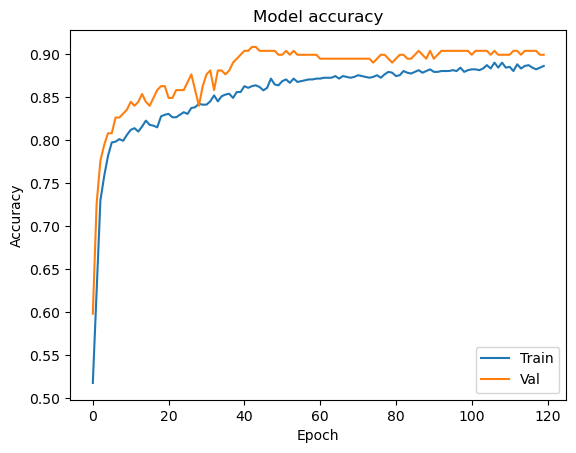

In [27]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### Adding regularization to our network

Our model is overfitting. Similarly to simpler machine learning models, we can add **regularization** to our neural network to help correct this. However, the exact types of regularization are somewhat different than the ones used for our usual classification models, and go by different names:

- L2 Regularization
    <img src="L2.png" width="200">
- Early Stopping
    <img src="Lossgraphic.png" width="200">
- Dropout
    <img src="dropout.png" width="400">



In [28]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [29]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [30]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 59ms/step - loss: 0.4541 - accuracy: 0.7896 - val_loss: 0.3087 - val_accuracy: 0.8767
Epoch 2/100
32/32 [==============================] - 2s 48ms/step - loss: 0.3543 - accuracy: 0.8493 - val_loss: 0.3332 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 1s 47ms/step - loss: 0.3499 - accuracy: 0.8425 - val_loss: 0.3576 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 2s 55ms/step - loss: 0.3714 - accuracy: 0.8444 - val_loss: 0.2522 - val_accuracy: 0.8813
Epoch 5/100
32/32 [==============================] - 2s 51ms/step - loss: 0.3095 - accuracy: 0.8689 - val_loss: 0.2472 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 2s 52ms/step - loss: 0.2856 - accuracy: 0.8826 - val_loss: 0.2285 - val_accuracy: 0.9178
Epoch 7/100
32/32 [==============================] - 1s 47ms/step - loss: 0.2866 - accuracy: 0.8865 - val_loss: 0.2105 - val_accuracy: 0.8950
Epoch 

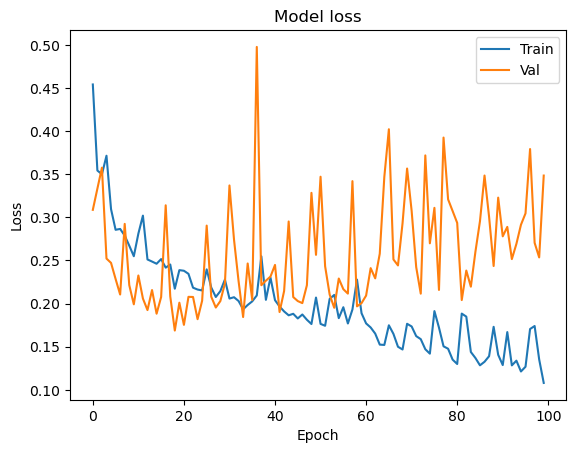

In [31]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

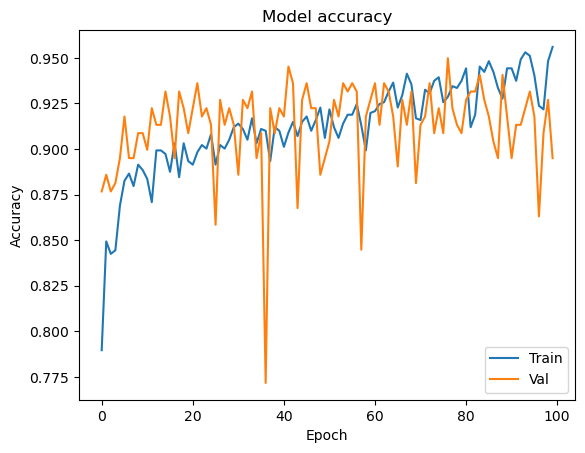

In [32]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [33]:
from keras.layers import Dropout
from keras import regularizers

In [34]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [35]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 8s 97ms/step - loss: 14.2207 - accuracy: 0.6145 - val_loss: 3.9129 - val_accuracy: 0.6438
Epoch 2/100
32/32 [==============================] - 2s 74ms/step - loss: 1.6937 - accuracy: 0.7710 - val_loss: 0.6074 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 2s 71ms/step - loss: 0.5778 - accuracy: 0.8532 - val_loss: 0.4944 - val_accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 3s 79ms/step - loss: 0.5072 - accuracy: 0.8591 - val_loss: 0.4449 - val_accuracy: 0.8995
Epoch 5/100
32/32 [==============================] - 3s 85ms/step - loss: 0.4891 - accuracy: 0.8659 - val_loss: 0.4344 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 3s 106ms/step - loss: 0.5018 - accuracy: 0.8523 - val_loss: 0.5051 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 2s 67ms/step - loss: 0.4909 - accuracy: 0.8738 - val_loss: 0.4269 - val_accuracy: 0.8950
Epoc

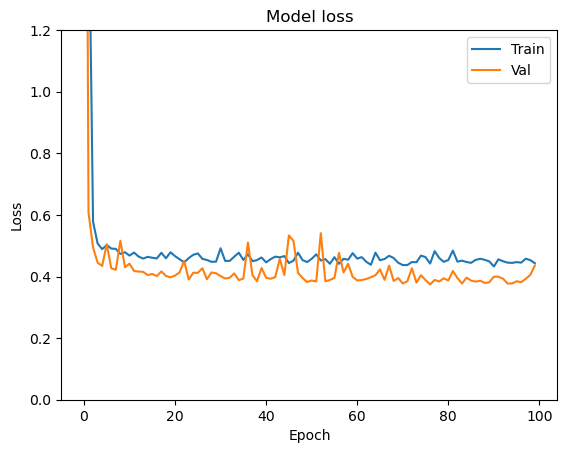

In [37]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

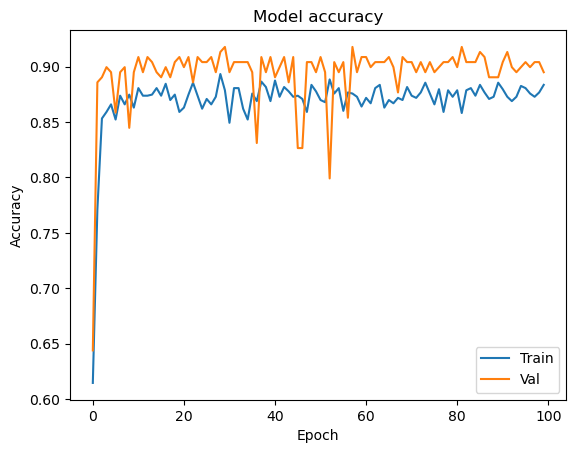

In [38]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()